In [3]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
filename = "../../20200404_LWB_Client_Events_Month.csv"

In [5]:
fullData = pd.read_csv(filename)
#data = pd.read_csv(filename, nrows=1000)

/Users/chenqinzhang/opt/anaconda3/envs/sem1_2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (849,856,934,935,936,938,939,940,941,942,943,944,945,947,948,949,951,952,953,975,976,978,1008,1014,1029) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data analysis for month data from column 238-478

In [17]:
pd.options.display.max_seq_items = 2000
#data = fullData[fullData.columns[238:478]]
prgcontct = fullData.filter(regex=r'^prgcontct_', axis=1)
progsubjcat = fullData.filter(regex=r'^progsubjcat_', axis=1)
data = pd.concat([prgcontct,progsubjcat],axis=1)
data.columns

Index(['prgcontct_meeting_group_of_people_piv',
       'prgcontct_other_organisation_piv',
       'prgcontct_meeting_lwb_internal_only_piv',
       'prgcontct_educational_institution_piv', 'prgcontct_employer_piv',
       'prgcontct_lwb_worker_piv', 'prgcontct_police_piv',
       'prgcontct_both_client_and_carer_piv',
       'prgcontct_health_professional_piv', 'prgcontct_department_piv',
       'prgcontct_other_stakeholder_piv', 'prgcontct_family_piv',
       'prgcontct_carer_piv', 'prgcontct_client_piv',
       'prgcontct_meeting_group_of_people_piv_sum_n_days',
       'prgcontct_other_organisation_piv_sum_n_days',
       'prgcontct_meeting_lwb_internal_only_piv_sum_n_days',
       'prgcontct_educational_institution_piv_sum_n_days',
       'prgcontct_employer_piv_sum_n_days',
       'prgcontct_lwb_worker_piv_sum_n_days',
       'prgcontct_police_piv_sum_n_days',
       'prgcontct_both_client_and_carer_piv_sum_n_days',
       'prgcontct_health_professional_piv_sum_n_days',
       'prg

In [22]:
#len(data[data['rowtype_progress_note_piv_sum_n_days']>0]['rowtype_progress_note_piv_sum_n_days'])
print(len(data.columns))

208


### Data cleaning

(1). Find columns that do not have any values. <br/>
(2). Find columns that only 1% have values. <br/>
(3). Find columns that only 2% have values. <br/>
(4). Find columns that only 5% have values. <br/>

In [19]:
def columns_low_values_occupation(threshold, data):
    targetColumn = []
    for i in data.columns:
        if len(data[data[i]!=0])/len(data[i]) <= threshold:
            targetColumn.append(i)
    return targetColumn

def print_num(threshold, targetColumn):
    print("The numbers of columns that values only occupied "+ str(threshold) + " of columns: "+ str(len(targetColumn)))


In [20]:
tc0 = columns_low_values_occupation(0, data)
print("The number of columns that have no values at all: "+ str(len(tc0)))

The number of columns that have no values at all: 8


In [23]:
tc1 = columns_low_values_occupation(0.01, data)
print_num(0.01, tc1)
tc2 = columns_low_values_occupation(0.02, data)
print_num(0.02, tc2)
tc3 = columns_low_values_occupation(0.05, data)
print_num(0.05, tc3)

The numbers of columns that values only occupied 0.01 of columns: 82
The numbers of columns that values only occupied 0.02 of columns: 93
The numbers of columns that values only occupied 0.05 of columns: 117


#### Let's just only drop the column with no value at all for now. 

In [24]:
cleanedData = data.drop(columns=tc0)
print(len(cleanedData.columns))

200


In [25]:
cleanedData.columns

Index(['prgcontct_meeting_group_of_people_piv',
       'prgcontct_other_organisation_piv',
       'prgcontct_meeting_lwb_internal_only_piv',
       'prgcontct_educational_institution_piv', 'prgcontct_employer_piv',
       'prgcontct_lwb_worker_piv', 'prgcontct_police_piv',
       'prgcontct_both_client_and_carer_piv',
       'prgcontct_health_professional_piv', 'prgcontct_department_piv',
       'prgcontct_other_stakeholder_piv', 'prgcontct_family_piv',
       'prgcontct_carer_piv', 'prgcontct_client_piv',
       'prgcontct_meeting_group_of_people_piv_sum_n_days',
       'prgcontct_other_organisation_piv_sum_n_days',
       'prgcontct_meeting_lwb_internal_only_piv_sum_n_days',
       'prgcontct_educational_institution_piv_sum_n_days',
       'prgcontct_employer_piv_sum_n_days',
       'prgcontct_lwb_worker_piv_sum_n_days',
       'prgcontct_police_piv_sum_n_days',
       'prgcontct_both_client_and_carer_piv_sum_n_days',
       'prgcontct_health_professional_piv_sum_n_days',
       'prg

### Data Visualisation 

(1). Visualize prgcontct data

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
prgcontct

,prgcontct_meeting_group_of_people_piv,prgcontct_other_organisation_piv,prgcontct_meeting_lwb_internal_only_piv,prgcontct_educational_institution_piv,prgcontct_employer_piv,prgcontct_lwb_worker_piv,prgcontct_police_piv,prgcontct_both_client_and_carer_piv,prgcontct_health_professional_piv,prgcontct_department_piv,...,prgcontct_employer_piv_days_since,prgcontct_lwb_worker_piv_days_since,prgcontct_police_piv_days_since,prgcontct_both_client_and_carer_piv_days_since,prgcontct_health_professional_piv_days_since,prgcontct_department_piv_days_since,prgcontct_other_stakeholder_piv_days_since,prgcontct_family_piv_days_since,prgcontct_carer_piv_days_since,prgcontct_client_piv_days_since
0,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,2868,3650,3650
1,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,22,3650,3650
2,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,52,3650,3650
3,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,83,3650,483
4,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,114,3650,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124288,0,0,0,0,0,0,0,0,0,1,...,3650,149,3650,3650,3650,29,3650,3650,3650,18
124289,0,0,0,0,0,0,0,0,0,0,...,3650,180,3650,3650,3650,34,3650,3650,3650,26
124290,0,0,0,0,0,0,0,0,0,0,...,3650,210,3650,3650,3650,64,3650,3650,3650,25
124291,0,0,0,0,0,0,0,0,0,0,...,3650,241,3650,3650,3650,95,3650,3650,3650,10


In [40]:

pivotType = ["_piv", "_sum_n_days", "_avg_n_days", "_piv_days_since"]
pivot_dict = {}
#prgcontct
for tp in pivotType:
    pivot_dict[tp] = prgcontct.filter(regex=r'{}$'.format(tp), axis=1)

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

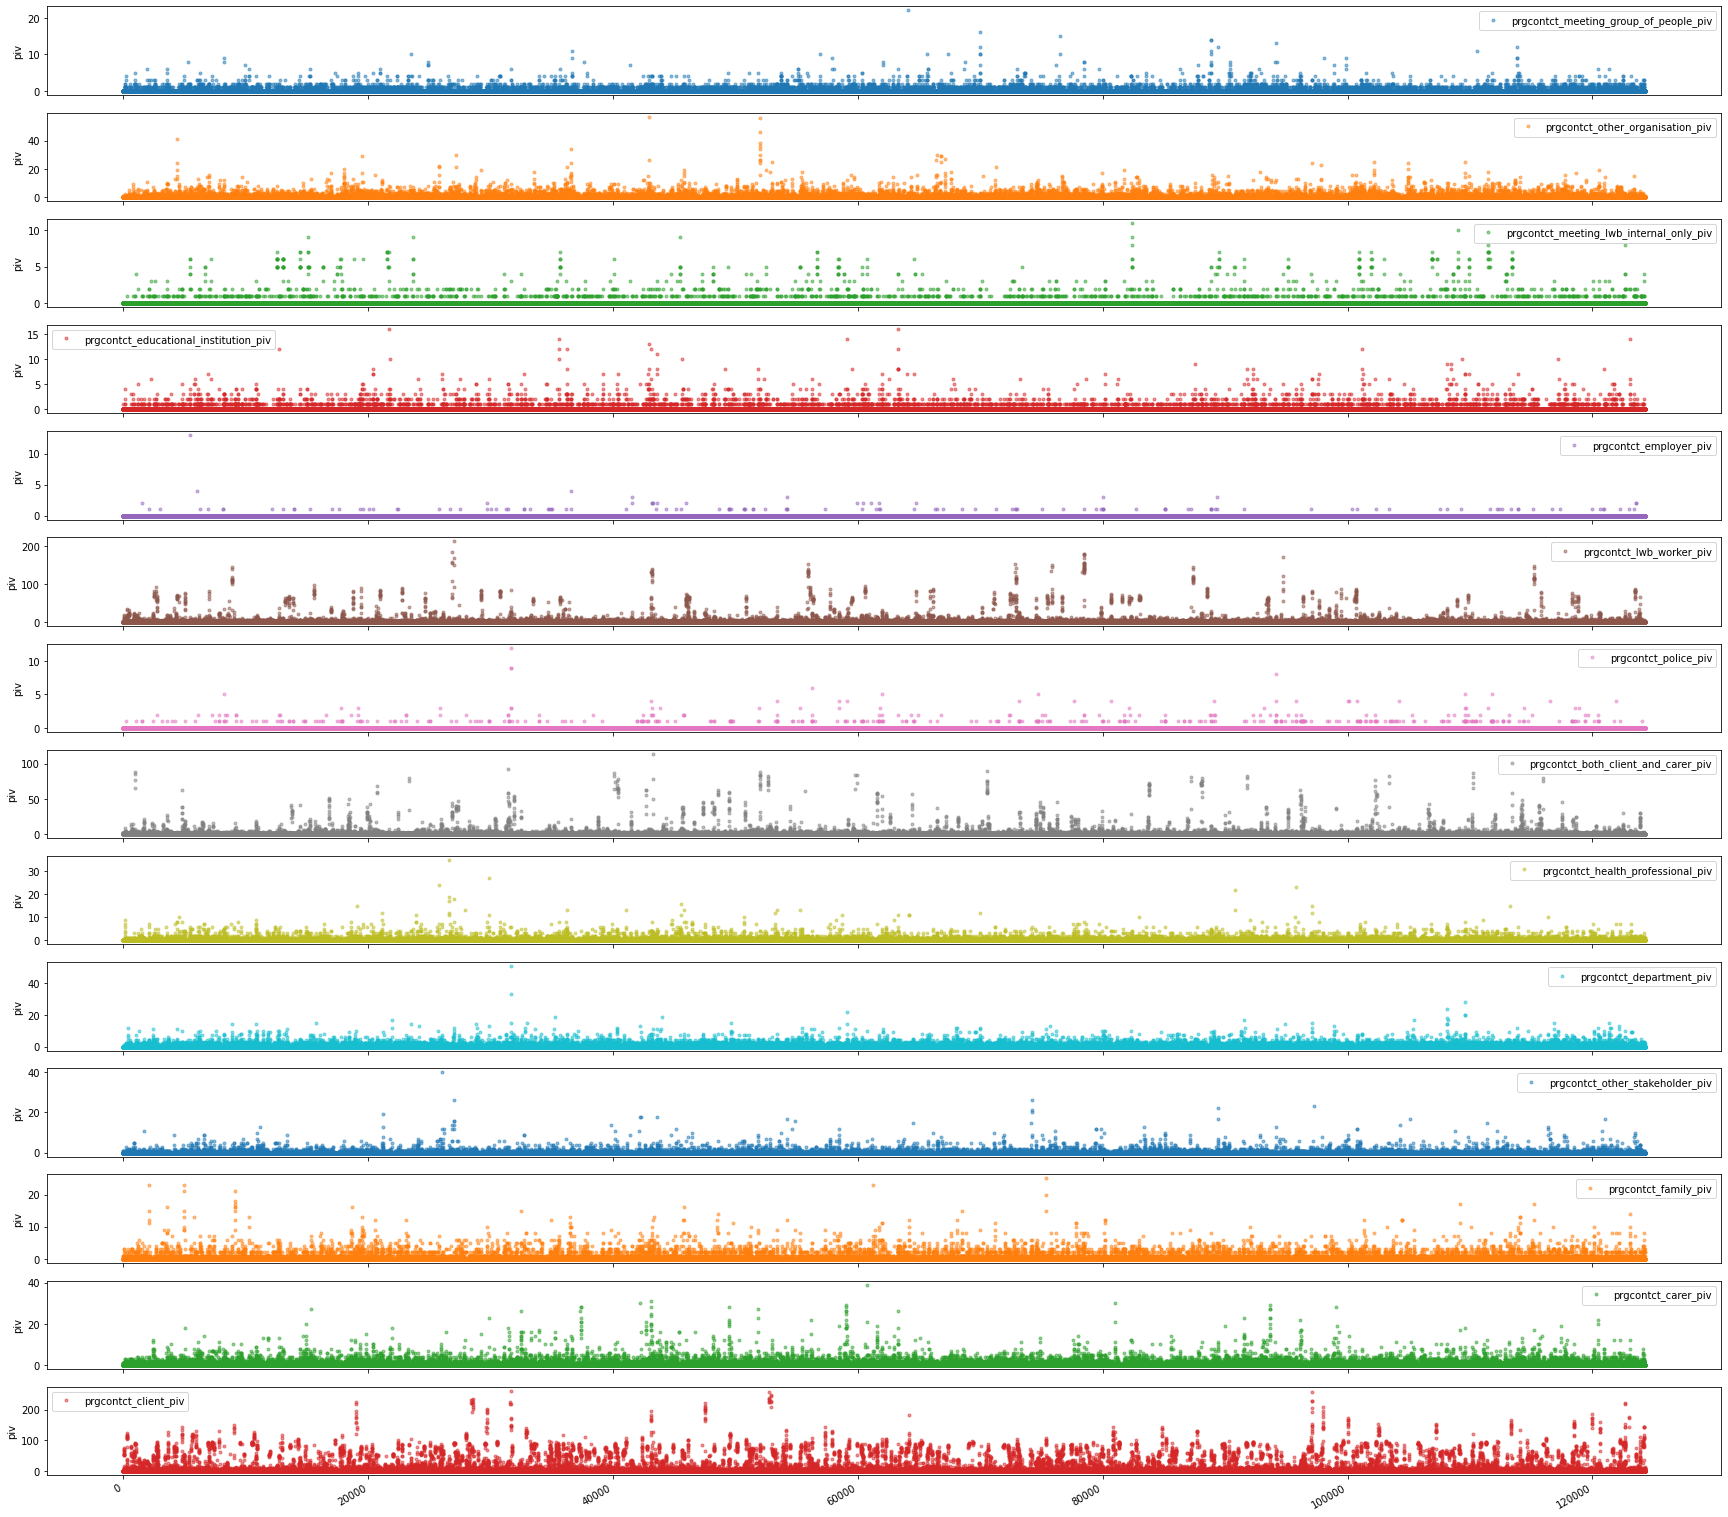

In [64]:
cols_plot = pivot_dict["_piv"].columns
axes = pivot_dict["_piv"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

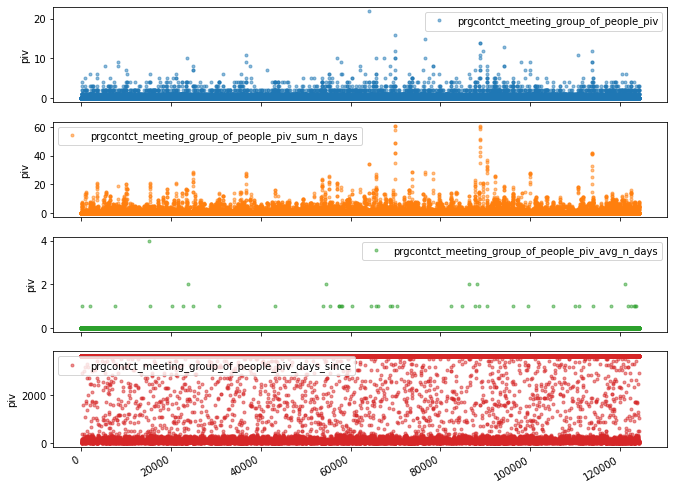

In [68]:
## see what's the differences if same event but different pivot type
mgop = prgcontct.filter(like='meeting_group_of_people')
cols_plot = mgop.columns
axes = mgop.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')


Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

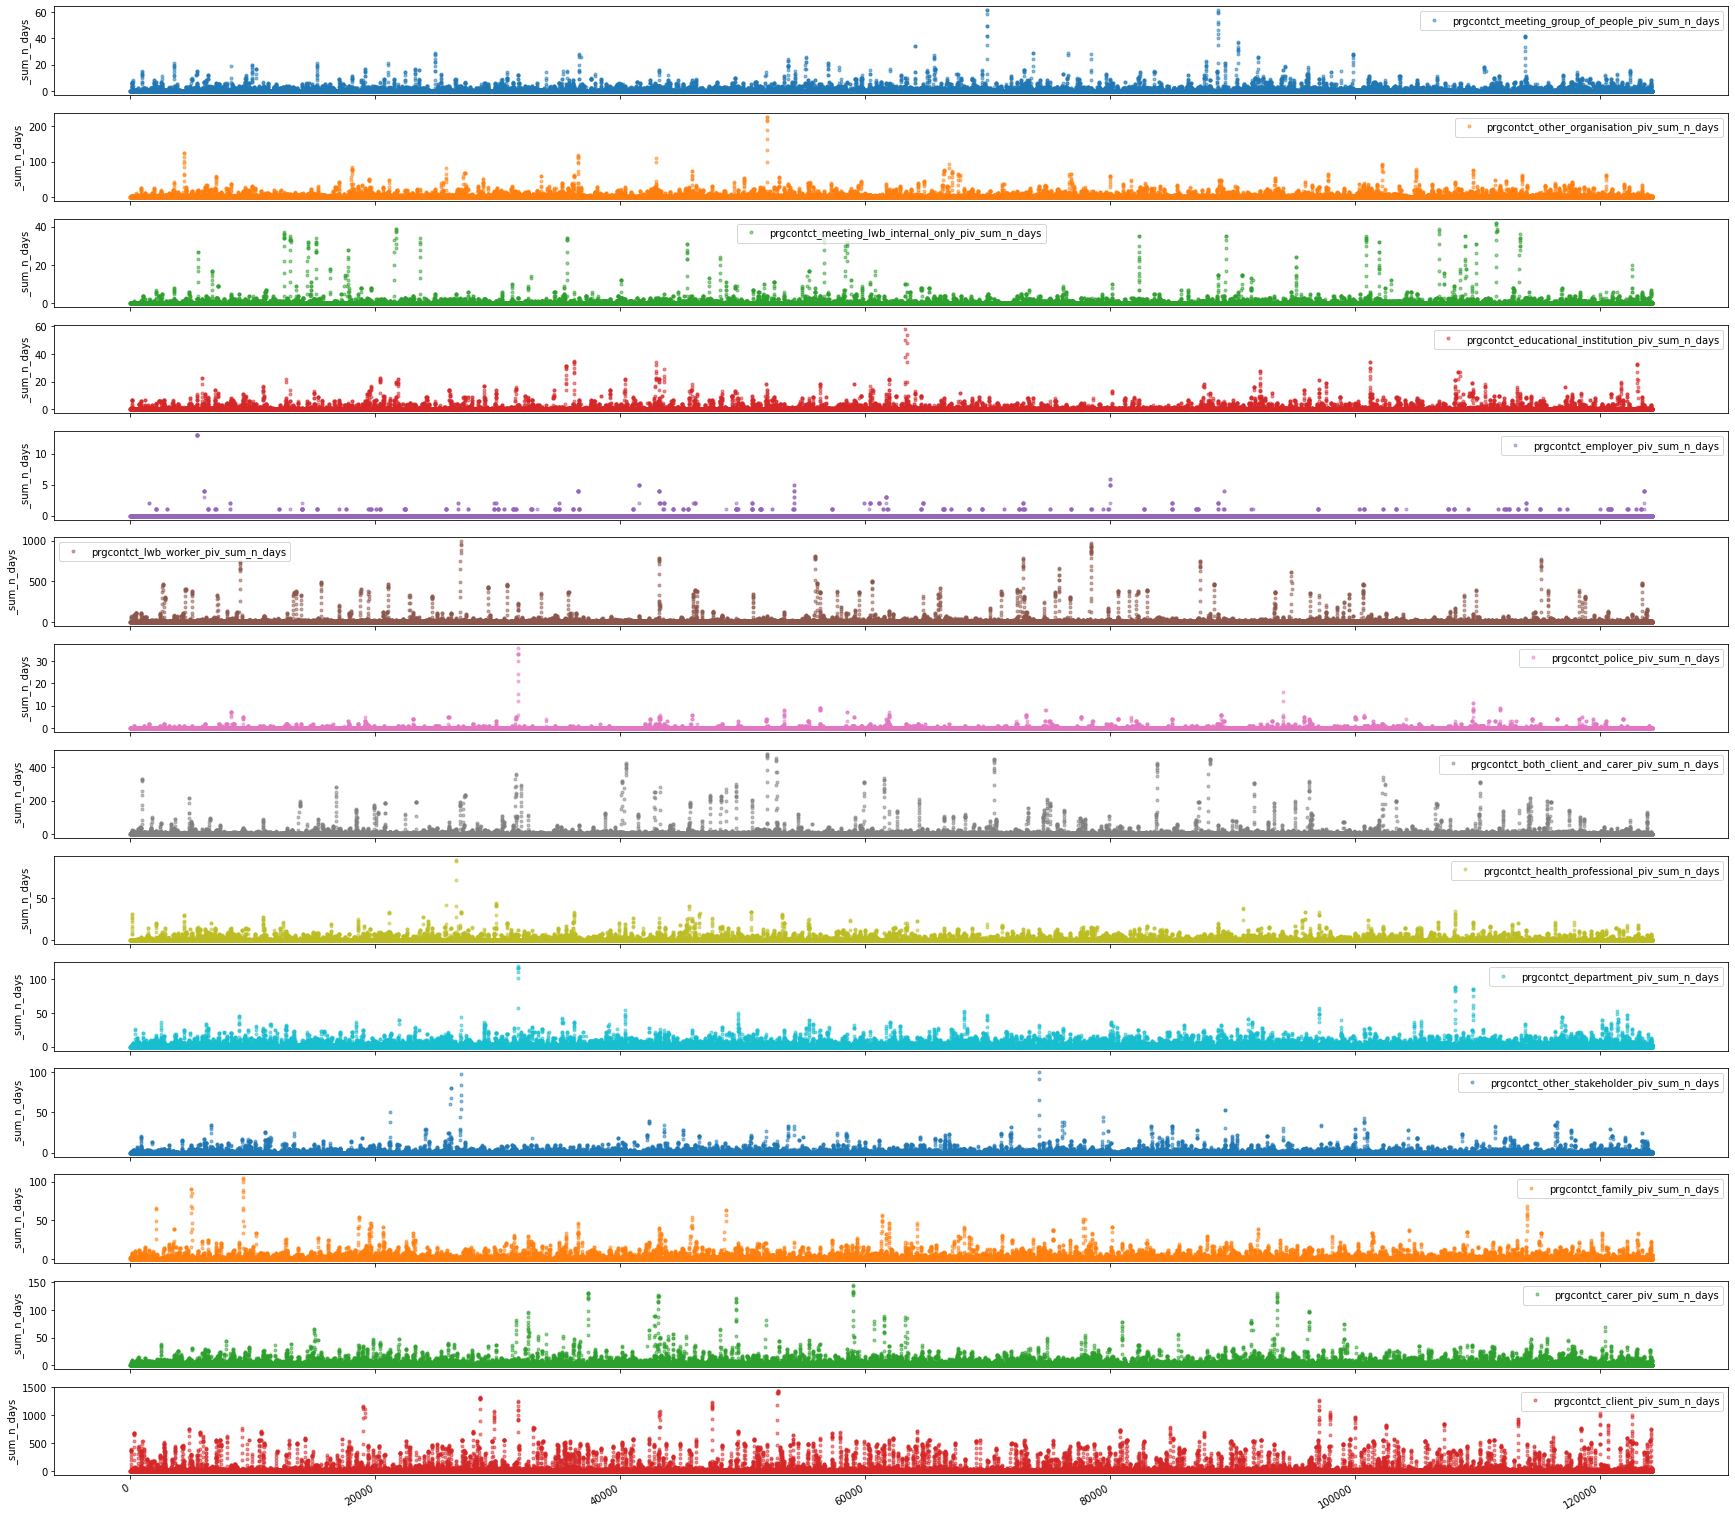

In [65]:
cols_plot = pivot_dict["_sum_n_days"].columns
axes = pivot_dict["_sum_n_days"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 30), subplots=True)
for ax in axes:
    ax.set_ylabel("_sum_n_days")


In [ ]:
sns.lineplot(data=pivot_dict[tp], dashes=False)

In [130]:

categ_list = ["progsubjcat_", "medc_", "client_status_","rp_", "incident_catgry_","incident_severity_", "rowtype_", 
              "restrictivepractice_","diagnosistype_", "prgcontct_"]
categ_dict = {}
for i in categ_list:
    if i not in categ_dict:
        categ_dict[i] = cleanedData.filter(regex=r'^'+i, axis=1)

## check about all names has been included
count = 0 
for i in categ_dict:
    count += len(categ_dict[i].columns)
    print(i+)
print(count)

222


In [ ]:
for i in categ_dict:
    
print(len(categ_dict[]))

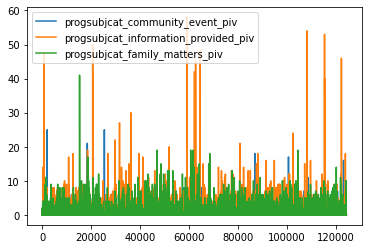

In [117]:

#data.filter(like='incident_catgry_')

incident_catgry = cleanedData.filter(regex=r'^incident_catgry_', axis=1)
trythis = cleanedData.iloc[:,[0,1,2]]
sns.lineplot(data=trythis, dashes=False)


In [7]:
data["diagnosiscat_acquired_brain_injury_piv"]


0         0
1         0
2         0
3         0
4         0
         ..
124288    0
124289    0
124290    0
124291    0
124292    0
Name: diagnosiscat_acquired_brain_injury_piv, Length: 124293, dtype: int64

Index(['progsubjcat_community_event_piv', 'progsubjcat_case_consult_piv',
       'progsubjcat_information_provided_piv',
       'progsubjcat_family_matters_piv', 'progsubjcat_legal_piv',
       'progsubjcat_incident_report_follow_up_piv', 'progsubjcat_respite_piv',
       'progsubjcat_case_discussion_planning_piv',
       'progsubjcat_medication_administration_piv',
       'progsubjcat_general_support_piv',
       'progsubjcat_i_sight_client_incident_system_generated_piv',
       'progsubjcat_placement_agreement_piv',
       'progsubjcat_education_and_employment_piv',
       'progsubjcat_placement_concerns_piv', 'progsubjcat_out_of_service_piv',
       'progsubjcat_achievements_and_memorabilia_piv',
       'progsubjcat_home_visit_piv', 'progsubjcat_family_contact_client_piv',
       'progsubjcat_health_and_wellbeing_piv',
       'progsubjcat_presenting_or_challenging_behaviours_piv',
       'progsubjcat_culture_piv', 'progsubjcat_identity_life_story_piv',
       'progsubjcat_fortnightl

In [14]:

len(data[data["progsubjcat_family_matters_piv"]!=0])

5011

In [26]:
noValueColumn =[]
for i in data.columns[238:478]:
    if len(data[data[i]!=0]) ==0:
        noValueColumn.append(i)


In [27]:
print(noValueColumn)

['progsubjcat_case_consult_piv', 'progsubjcat_general_support_piv', 'progsubjcat_placement_concerns_piv', 'progsubjcat_family_contact_client_piv', 'progsubjcat_stakeholder_meeting_piv', 'progsubjcat_training_and_development_piv', 'progsubjcat_annual_review_piv', 'progsubjcat_biological_family_carer_piv', 'client_status_deactivated_unable_to_locate_piv', 'client_status_deactivated_deceased_piv', 'client_status_deactivated_in_jail_piv', 'client_status_precontact_piv', 'client_status_deactivating_piv', 'client_status_preactivation_piv', 'client_status_deactivated_change_of_circumstance_piv', 'client_status_deactivated_other_piv', 'client_status_deactivated_in_hospital_piv', 'client_status_first_contact_piv']


In [73]:
row = 'allrows_client_incident_critical_total_count'
data[data[row]!=data[row][0]][row]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
124288   NaN
124289   NaN
124290   NaN
124291   NaN
124292   NaN
Name: allrows_client_incident_critical_total_count, Length: 124293, dtype: float64

In [65]:
data[ 'rowtype_client_address_addition_piv_sum_n_days']

0         0.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
124288    0.0
124289    0.0
124290    0.0
124291    0.0
124292    0.0
Name: rowtype_client_address_addition_piv_sum_n_days, Length: 124293, dtype: float64

In [58]:
data.columns[1000:]

Index(['allrows_datejoin_placement_fundingcontractid',
       'allrows_datejoin_placement_isemergency',
       'allrows_datejoin_placement_placementagreementused',
       'allrows_datejoin_placement_isplacedwithcarerentity',
       'allrows_datejoin_placement_serviceoutletid',
       'allrows_datejoin_placement_placementreasonid',
       'allrows_datejoin_placement_isplanned',
       'allrows_datejoin_placement_endedduetorelatedincident',
       'allrows_datejoin_placement_placementendreasonid',
       'allrows_datejoin_placement_isrecurring',
       'allrows_datejoin_placement_isdeliveredaspartofprimary',
       'allrows_datejoin_placement_placementattendancestatus',
       'allrows_datejoin_placement_hasattachment',
       'allrows_datejoin_placement_start_reasondesc_anon_hash',
       'allrows_datejoin_placement_end_reasondesc_anon_hash',
       'allrows_datejoin_placement_serviceoutlet_addresstypeid',
       'allrows_datejoin_placement_serviceoutlet_typeother',
       'allrows_date

In [ ]:
'client_status_active_piv'
'client_status_activating_piv'

In [71]:
data['allrows_client_incident_critical_total_count'][0]

nan

In [74]:
print(len(data))

124293


In [1]:
fullData.columns[730:944]

NameError: name 'fullData' is not defined